In [ ]:
!gdown -- https://drive.google.com/uc?nid=1L1C4Pc3R__o8h-vX_KNG_de4csDk9icm
!unzip -qq "/content/Task1_open.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1L1C4Pc3R__o8h-vX_KNG_de4csDk9icm
From (redirected): https://drive.google.com/uc?id=1L1C4Pc3R__o8h-vX_KNG_de4csDk9icm&confirm=t&uuid=6e1c96fd-8340-4367-ade3-84567894164c
To: /content/Task1_open.zip
100% 1.55G/1.55G [00:17<00:00, 86.1MB/s]
replace anwer_sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


(129, 295)
float32


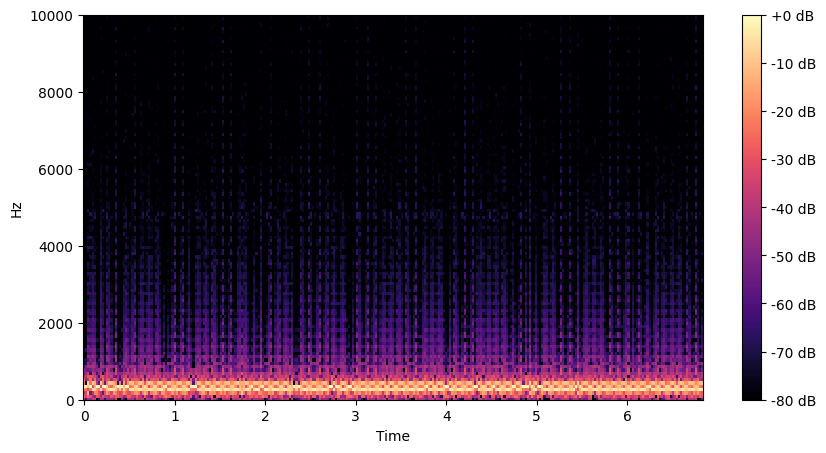

In [ ]:
# 한 개의 스펙트로그램을 npy 파일로부터 불러옴
train_sp = np.load("/content/train_npy/spc_00002.npy")

array = train_sp

print(array.shape)
print(array.dtype)

# 스펙트로그램 시각화 (옵션)
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(array, ref=np.max), y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0, 10000)
plt.show()

In [ ]:
# 폴더 경로
train_folder_path = '/content/train_npy'
test_folder_path = '/content/test_npy'

# 모든 npy 파일 가져오기
R_train_files = [f for f in os.listdir(train_folder_path) if f.endswith('.npy')]
R_test_files = [f for f in os.listdir(test_folder_path) if f.endswith('.npy')]

# 파일 이름을 기준으로 정렬
train_files = sorted(R_train_files)
test_files = sorted(R_test_files)

# 데이터와 레이블을 저장할 리스트
x_train = []
x_test = []
y_train = []
y_test = []

# 가장 큰 데이터 크기를 찾음
max_length = 0

# train 데이터 읽어오기
for npy_file in train_files:
    train_npy_file_path = os.path.join(train_folder_path, npy_file)
    train_data = np.load(train_npy_file_path)

    if train_data.shape[1] > max_length:
        max_length = train_data.shape[1]

    x_train.append(train_data)

# test 데이터 읽어오기
for npy_file in test_files:
    test_npy_file_path = os.path.join(test_folder_path, npy_file)
    test_data = np.load(test_npy_file_path)

    if test_data.shape[1] > max_length:
        max_length = test_data.shape[1]

    x_test.append(test_data)

y_train_path = pd.read_csv('/content/train.csv')
y_test_path = pd.read_csv('/content/anwer_sample.csv')


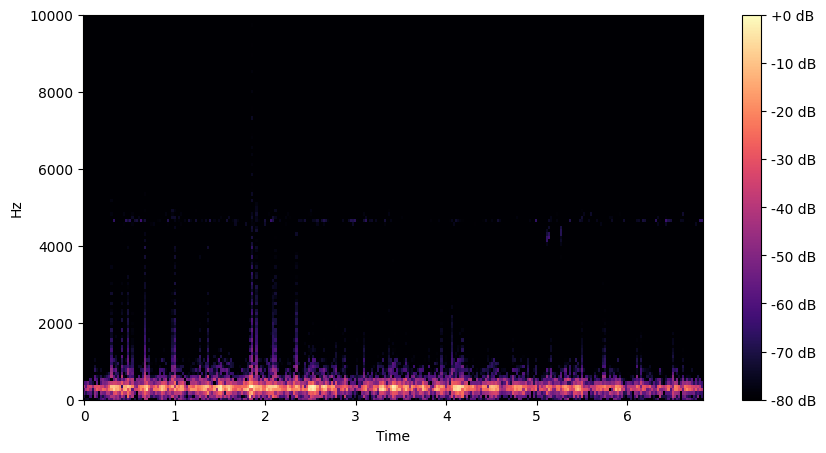

In [ ]:
# 스펙트로그램 시각화 (옵션)
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(x_train[5], ref=np.max), y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0, 10000)
plt.show()

In [ ]:
# 모든 데이터를 패딩하여 동일한 크기로 조정
padded_x_train = []
padded_x_test = []

for data in x_train:
    pad_width = max_length - data.shape[1]
    padded_data = np.pad(data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    padded_x_train.append(padded_data)

for data in x_test:
    pad_width = max_length - data.shape[1]
    padded_data = np.pad(data, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    padded_x_test.append(padded_data)

# 모든 데이터를 배열로 변환
x_train = np.array(padded_x_train)
x_test = np.array(padded_x_test)

In [ ]:
y_train_path = pd.read_csv('/content/train.csv')
y_test_path = pd.read_csv('/content/anwer_sample.csv')


y_train = y_train_path['label']
y_test = y_test_path['label']

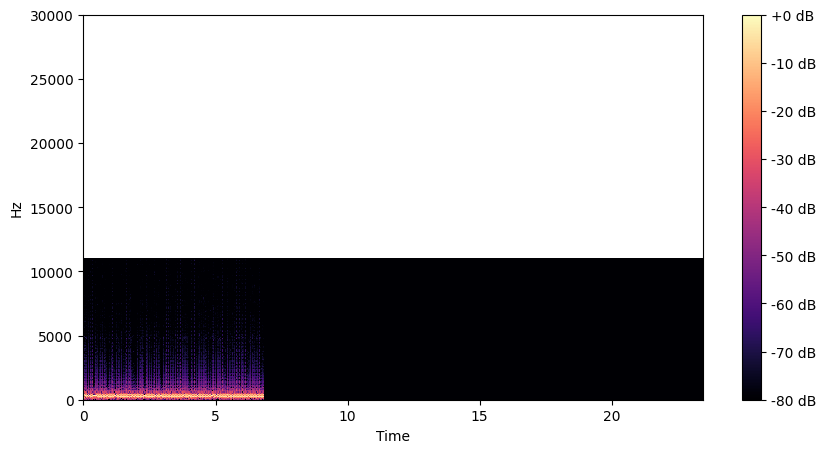

In [ ]:
# 스펙트로그램 시각화 (옵션)
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(x_train[1], ref=np.max), y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0, 30000)
plt.show()

In [ ]:
#훈련 세트와 테스트 세트 분리

train_input, test_input, train_target, test_target = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#데이터 클래스 확인
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_counts_dict = dict(zip(unique_classes, class_counts))
print("Class counts:", class_counts_dict)

Class counts: {0: 3988, 1: 2012}


In [ ]:
from sklearn.utils import resample

# 소수 클래스와 다수 클래스 분리
x_minority = x_train[y_train == 1]
x_majority = x_train[y_train == 0]

# 소수 클래스 업샘플링
x_minority_upsampled = resample(x_minority, replace=True, n_samples=len(x_majority))

# 업샘플링된 소수 클래스와 다수 클래스 합치기
x_train = np.concatenate([x_majority, x_minority_upsampled])
y_train = np.concatenate([np.zeros(len(x_majority)), np.ones(len(x_minority_upsampled))])

In [ ]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_counts_dict = dict(zip(unique_classes, class_counts))
print("Class counts:", class_counts_dict)

Class counts: {0.0: 3988, 1.0: 3988}


In [ ]:
model = models.Sequential()

# 입력층
model.add(layers.Input(shape=(129, 1011, 1)))

# 첫 번째 Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 두 번째 Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 네 번째 Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 다섯 번째 Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# 출력층
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 1009, 16)     160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 504, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 502, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 251, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 249, 32)       9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 124, 32)       0

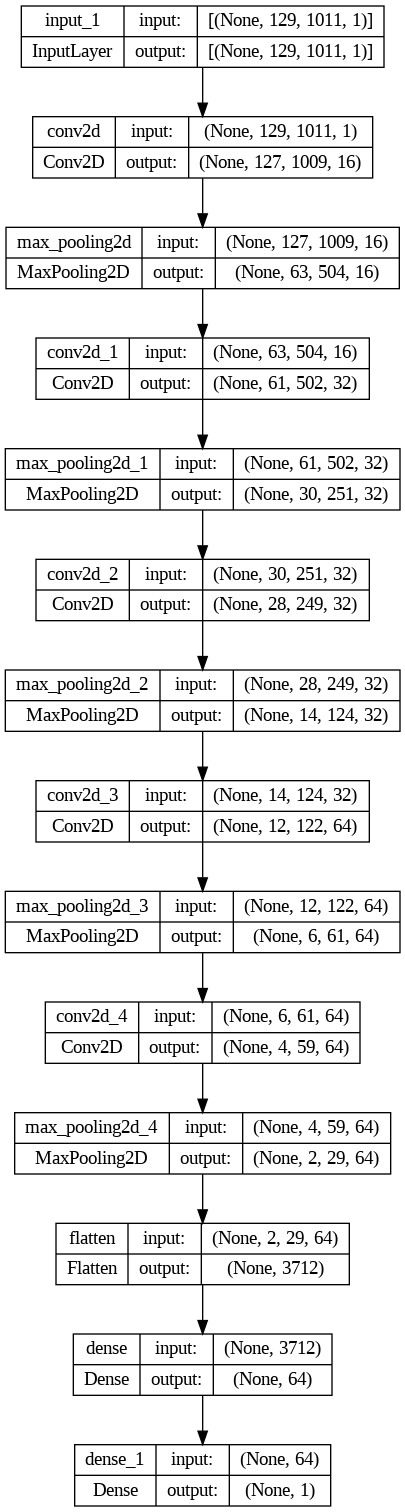

In [ ]:
from tensorflow.keras.utils import plot_model, to_categorical

plot_model(model, show_shapes=True)

In [ ]:
x_train_ln, x_val, y_train_ln, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model.fit(x_train_ln, y_train_ln, epochs=100, batch_size = 32, validation_data=(x_val, y_val))

Epoch 1/100
200/200 [==============================] - 21s 106ms/step - loss: 0.0917 - accuracy: 0.9688 - val_loss: 2.4175 - val_accuracy: 0.8910
Epoch 2/100
200/200 [==============================] - 20s 98ms/step - loss: 0.1061 - accuracy: 0.9660 - val_loss: 3.0600 - val_accuracy: 0.8941
Epoch 3/100
200/200 [==============================] - 19s 97ms/step - loss: 0.0911 - accuracy: 0.9707 - val_loss: 2.1930 - val_accuracy: 0.8816
Epoch 4/100
200/200 [==============================] - 19s 97ms/step - loss: 0.0848 - accuracy: 0.9687 - val_loss: 2.7658 - val_accuracy: 0.8947
Epoch 5/100
200/200 [==============================] - 19s 97ms/step - loss: 0.0783 - accuracy: 0.9708 - val_loss: 2.6855 - val_accuracy: 0.8929
Epoch 6/100
200/200 [==============================] - 19s 97ms/step - loss: 0.0749 - accuracy: 0.9719 - val_loss: 2.5998 - val_accuracy: 0.8947
Epoch 7/100
200/200 [==============================] - 19s 97ms/step - loss: 0.0774 - accuracy: 0.9723 - val_loss: 2.6536 - val_a

KeyboardInterrupt: 

In [ ]:
# 모델 학습과정 표시하기
def plot_history(history_dict):
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(loss) + 1)
  fig = plt.figure(figsize= (14, 5))

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, loss, 'b--', label='train_loss')
  ax1.plot(epochs, val_loss, 'r:', label='val_loss')
  ax1.set_title('Learnig process')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, acc, 'b--', label='train_accuracy')
  ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
  ax2.set_title('Learnig process')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

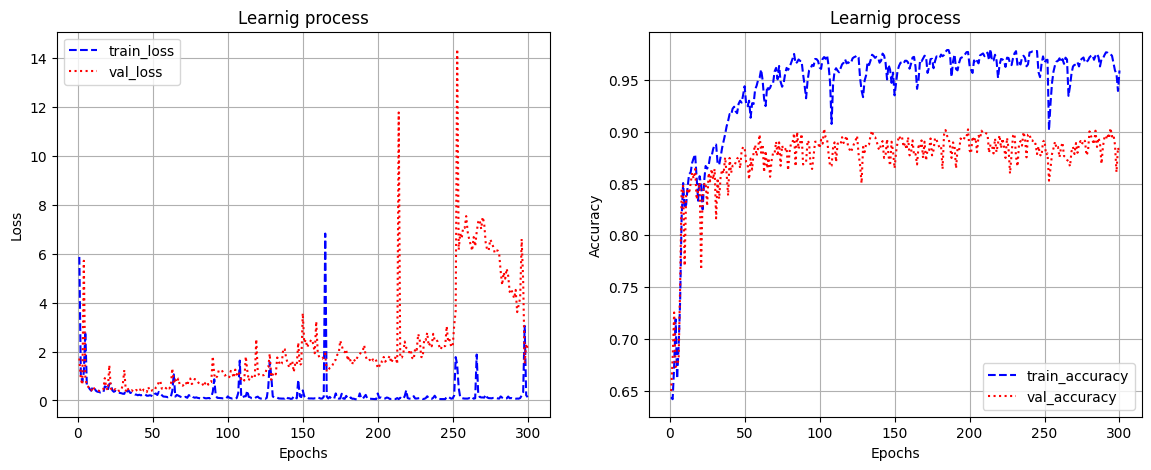

In [ ]:
plot_history(history_dict=model.history.history)

In [ ]:
count_0 = np.sum(y_train == 0)
count_1 = np.sum(y_train == 1)

print(f"0의 개수: {count_0}")
print(f"1의 개수: {count_1}")

0의 개수: 3988
1의 개수: 3988


In [ ]:
from tensorflow.keras.models import load_model


model= load_model('my_model.h5')

38/38 [==============================] - 2s 46ms/step


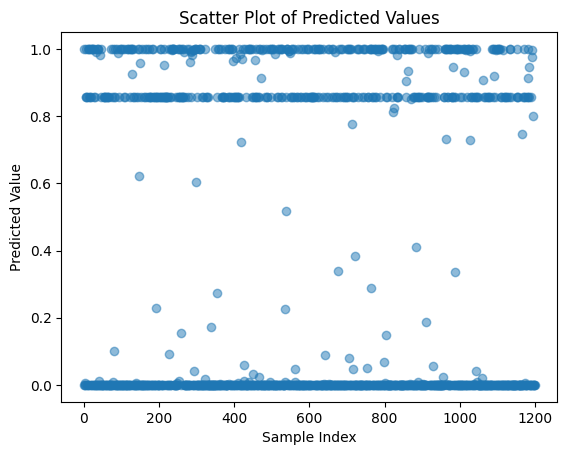

In [ ]:
y_pred = model.predict(test_input)

# Scatter plot
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot of Predicted Values')
plt.show()

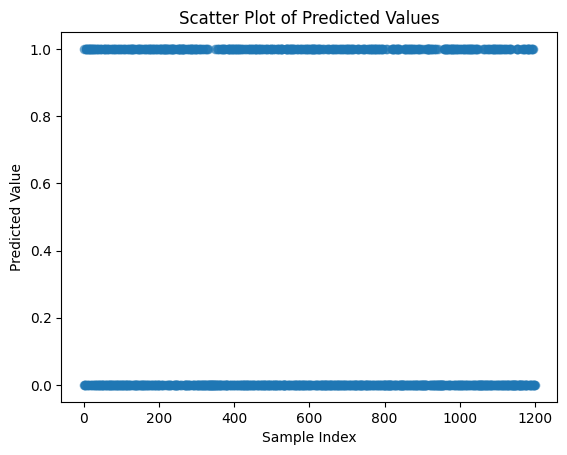

In [ ]:
y_pred_binary = np.where(y_pred <0.5, 0, 1)


# Scatter plot
plt.scatter(range(len(y_pred_binary)), y_pred_binary, alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot of Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_target, y_pred_binary)
print(f'Accuracy = {accuracy}')

Accuracy = 0.9225


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(test_target, y_pred_binary)
print(f'F1 Score: {f1}')

F1 Score: 0.8972375690607735


In [ ]:
# 모델 저장
model.save('wonu.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
